<a href="https://colab.research.google.com/github/Vaishuselvan/JayaVaishnaviDevi_5C9FF71C16108ED836E4F7B040303281/blob/main/houselone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOUSE LOAN PREDICTION USING REGRESSION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HOUSE LOAN/data.csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape #to check rows and column

(4600, 18)

In [ ]:
df.info() #describe csv file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum() #to check null values in all rows and sum it

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


CORRELATION OF FEATURES

In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
df_corr = df_numeric.corr()


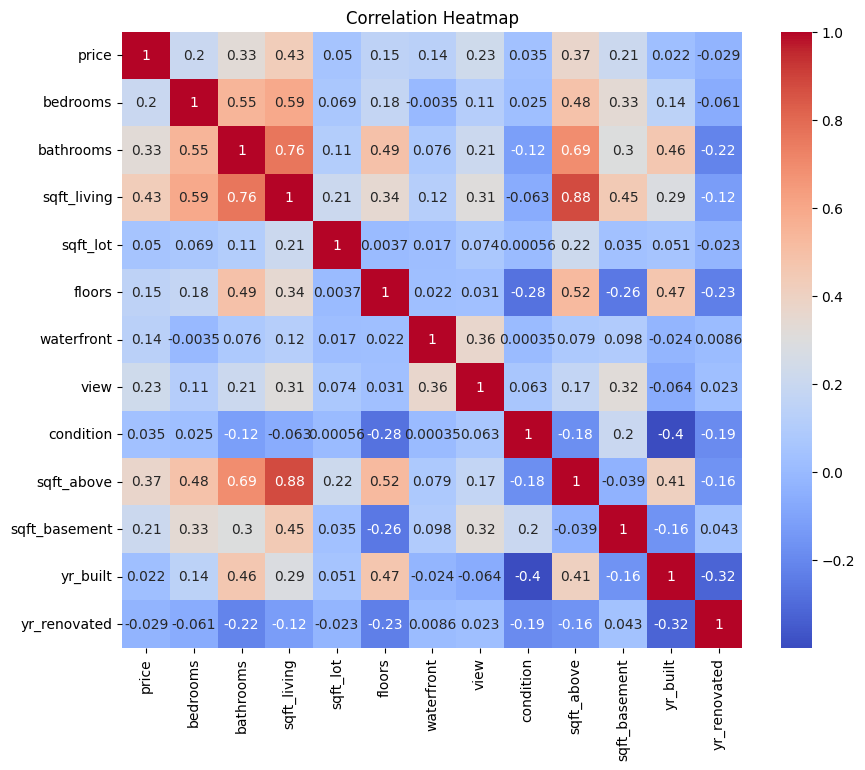

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

REMOVE UN WANTED COLUMNS

In [ ]:
drop_col = ['date', 'street', 'city', 'statezip', 'country']
df.drop(drop_col, axis=1, inplace=True)

droped column

In [ ]:
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
df.shape

(4600, 13)

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
scaler = StandardScaler() #to make each and every unit of data as standared
scaler.fit(df) # to train
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns) # to implement

ALGORITHM

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("xtrain", x_train.shape)
print("xtest", x_test.shape)
print("ytrain", y_train.shape)
print("ytest", y_test.shape)


xtrain (3680, 12)
xtest (920, 12)
ytrain (3680,)
ytest (920,)


In [ ]:
y_train.head()

,price
1898,685000.0
1370,857000.0
3038,675000.0
2361,1485000.0
156,561000.0


In [ ]:
y_test.head()

,price
3683,544000.0
4411,0.0
2584,1712500.0
69,365000.0
1844,275000.0


In [ ]:
x_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1898,4.0,2.5,2770,45514,2.0,0,0,4,2770,0,1989,0
1370,4.0,3.0,3720,29043,2.0,0,0,3,3720,0,1991,0
3038,4.0,2.5,2810,11120,2.0,0,0,3,2810,0,1982,0


In [ ]:
x_test.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
3683,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0
4411,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0
2584,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000


LinearRegression


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict) #Heavily penalizes larger errors
r2 = r2_score(y_test, y_predict) #How well the model explains the variability of the target
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 986921767056.0986
R2 Score: 0.032283856632802865


DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 1052435064830.0481
R2 Score: -0.03195454399563258


KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 997726579070.4683
R2 Score: 0.021689307640796573


In [ ]:
print(y_predict)

[ 436200.         419055.8857142  924680.         389330.
  290873.3333334  702522.5        435920.         538632.
  364681.65       538200.         580400.         440610.1851852
  598189.         412100.         386990.         595000.
  572200.         513966.6666666  473400.         771000.
  619800.         817900.         566410.         289280.
  327679.         268730.         622200.         905288.75
  450723.5        543300.        1726500.         431486.4
  856706.2        362720.         243316.6666666  536965.
  796000.         522000.         245666.6666666  525098.
  352288.8888888  251800.         463800.         424000.
  369516.         429000.         432177.6        522500.
  905288.75       524935.         972466.666666   479960.
  528590.         639140.2        353200.         331513.3333334
 1294000.         783660.         578690.         386100.
  545720.         744999.         271242.         836500.
  630021.1428572  756777.8        926560.         81992

mean-sqr-error : Lower MSE means the model's predictions are closer to the actual values.

An R² score closer to 1 is better, and it indicates that the model is explaining more of the variance in the data.

If R² is negative, it means the model performs worse than a horizontal line (predicting the mean value of the target).